### Загрузим данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Data_Projects.csv', ';')

## Посмотрим на данные и их статистики.

In [3]:
data.head()

,AddressCount,CallsCount,ClicksCount,FirmsCount,GeoPart,MobilePart,UsersCount,Distance,IsGeo
0,156,20,1903,176,"0,416104363472785","0,535762483130904",1125,"749,966084023684",1
1,17,37,258,20,"0,211678832116788","0,430656934306569",157,"2289,03242434015",0
2,78,56,1956,185,"0,349475383373688","0,476594027441485",1195,"1423,37651183958",1
3,14,70,378,19,"0,318718381112985","0,463743676222597",206,"3396,56608856838",0
4,111,90,4089,90,"0,55617545209696","0,490573297422085",2934,"1576,51415402623",1


In [4]:
data.describe()

,AddressCount,CallsCount,ClicksCount,FirmsCount,UsersCount,IsGeo
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1048.037975,3648.683544,21826.012658,305.088608,9753.126582,0.354430
std,1642.066119,8124.105402,32474.959513,382.052090,13927.295721,0.481397
min,9.000000,20.000000,258.000000,14.000000,157.000000,0.000000
25%,81.000000,346.000000,2055.000000,71.500000,1167.500000,0.000000
50%,371.000000,931.000000,6921.000000,185.000000,2934.000000,0.000000
75%,1195.000000,2457.500000,30625.500000,402.500000,13265.000000,1.000000
max,9552.000000,48497.000000,167155.000000,2379.000000,61127.000000,1.000000


(array([49.,  8.,  8.,  5.,  2.,  1.,  3.,  0.,  1.,  2.]),
 array([  157.,  6254., 12351., 18448., 24545., 30642., 36739., 42836.,
        48933., 55030., 61127.]),
 <a list of 10 Patch objects>)

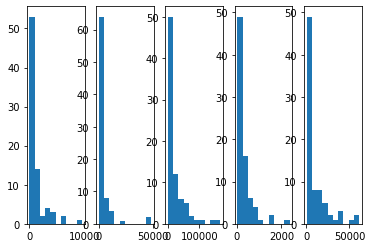

In [5]:
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)
ax1.hist(data['AddressCount'])
ax2.hist(data['CallsCount'])
ax3.hist(data['ClicksCount'])
ax4.hist(data['FirmsCount'])
ax5.hist(data['UsersCount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21e09b69b88>,
 'caps': [<matplotlib.lines.Line2D at 0x21e09cf5e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x21e09c9c2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x21e09cf5708>],
 'fliers': [<matplotlib.lines.Line2D at 0x21e09cdd6c8>],
 'means': []}

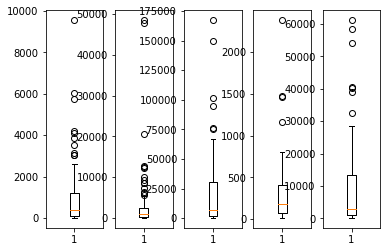

In [6]:
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)
ax1.boxplot(data['AddressCount'])
ax2.boxplot(data['CallsCount'])
ax3.boxplot(data['ClicksCount'])
ax4.boxplot(data['FirmsCount'])
ax5.boxplot(data['UsersCount'])

Мы не можем точно судить о том, что у нас есть выбросы. 

In [7]:
data = data[(data['AddressCount'] < 8000) & (data['CallsCount'] < 40000) 
            & (data['ClicksCount'] < 125000) & (data['FirmsCount'] < 2000)]


(array([48.,  2.,  7.,  7.,  1.,  5.,  1.,  0.,  1.,  3.]),
 array([  157. ,  4202.7,  8248.4, 12294.1, 16339.8, 20385.5, 24431.2,
        28476.9, 32522.6, 36568.3, 40614. ]),
 <a list of 10 Patch objects>)

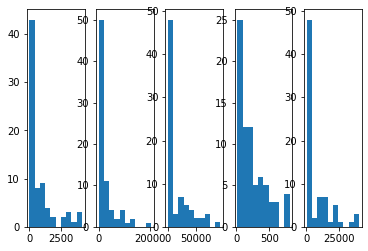

In [8]:
_, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5)
ax1.hist(data['AddressCount'])
ax2.hist(data['CallsCount'])
ax3.hist(data['ClicksCount'])
ax4.hist(data['FirmsCount'])
ax5.hist(data['UsersCount'])

In [9]:
from scipy.stats import anderson

In [10]:
print('Подсчитаем для всех этих 5 признаков критерий АД на экспоненциальное распределение(т.к на него наиболее похожи):')
print('AddressCount: ', anderson(data['AddressCount'], dist='expon').statistic, '>',
      anderson(data['AddressCount'], dist='expon').critical_values[4], 'при a=0.01, H0 отвергаем' )
print('CallsCount: ', anderson(data['CallsCount'], dist='expon').statistic, '>',
      anderson(data['CallsCount'], dist='expon').critical_values[4], 'при a=0.01, H0 отвергаем' )
print('ClicksCount: ', anderson(data['ClicksCount'], dist='expon').statistic, '>',
      anderson(data['ClicksCount'], dist='expon').critical_values[4], 'при a=0.01, H0 отвергаем' )
print('FirmsCount: ', anderson(data['FirmsCount'], dist='expon').statistic, '<',
      anderson(data['FirmsCount'], dist='expon').critical_values[4], 'при a=0.01, H0 принимаем' )
print('UsersCount: ', anderson(data['UsersCount'], dist='expon').statistic, '>',
      anderson(data['UsersCount'], dist='expon').critical_values[4], 'при a=0.01, H0 отвергаем' )


Подсчитаем для всех этих 5 признаков критерий АД на экспоненциальное распределение(т.к на него наиболее похожи):
AddressCount:  7.175171805110651 > 1.941 при a=0.01, H0 отвергаем
CallsCount:  6.3712215275769495 > 1.941 при a=0.01, H0 отвергаем
ClicksCount:  7.111964348713258 > 1.941 при a=0.01, H0 отвергаем
FirmsCount:  0.35589663392264015 < 1.941 при a=0.01, H0 принимаем
UsersCount:  6.1567013050010075 > 1.941 при a=0.01, H0 отвергаем


Из всех этих распределений признаков мы можем с уверенностью сказать только про FirmsCount.

### Проверим скоррелированность наших переменных

Наши распределения +- похожи по гистограммам, потому проверим корреляцию между величинами с помощью коэффициента Спирмена(т.к НСВ не нормальная)

In [11]:
from scipy.stats import spearmanr
corradr_call, p = spearmanr(data.AddressCount, data.CallsCount)
corradr_clicks, p = spearmanr(data.AddressCount, data.ClicksCount)
corradr_firms, p = spearmanr(data.AddressCount, data.FirmsCount)
corradr_users, p = spearmanr(data.AddressCount, data.UsersCount)
print('Рассмотрим к-ты для AddressCount и остальных:', corradr_call, ', ', 
      corradr_clicks, ', ', corradr_firms, ', ', corradr_users,
      '\nМы видим, что эта переменная сильно скоррелирована с другими.')


corrcall_clicks, p = spearmanr(data.CallsCount, data.ClicksCount)
corrcall_firms, p = spearmanr(data.CallsCount, data.FirmsCount)
corrcall_users, p = spearmanr(data.CallsCount, data.UsersCount)
print('Рассмотрим к-ты для CallsCount и остальных:', corrcall_clicks, ', ', 
      corrcall_firms, ', ', corrcall_users, 
      '\nМы видим, что эта переменная тоже сильно скоррелирована с другими.')

corrfirms_users, p = spearmanr(data.FirmsCount, data.UsersCount)
print('Рассмотрим к-ты для FirmsCount и UsersCount:', corrfirms_users,
      '\nМы видим, что эти переменные тоже сильно скоррелированы.')

Рассмотрим к-ты для AddressCount и остальных: 0.872316818250677 ,  0.9575242892048305 ,  0.7088303282657337 ,  0.9649923897475567 
Мы видим, что эта переменная сильно скоррелирована с другими.
Рассмотрим к-ты для CallsCount и остальных: 0.9061735419630155 ,  0.6662731069747219 ,  0.866145092460882 
Мы видим, что эта переменная тоже сильно скоррелирована с другими.
Рассмотрим к-ты для FirmsCount и UsersCount: 0.7447242830489692 
Мы видим, что эти переменные тоже сильно скоррелированы.


Оставим 3 переменные: AddressCount, CallsCount, FirmsCount для подсчета признака. Как признак возьмем переменную UsersCount.

In [12]:
y = data['UsersCount']
data = data.drop(['ClicksCount', 'UsersCount', 'GeoPart', 'MobilePart', 'Distance'], axis='columns')

In [25]:
data['CallsCount'] = (data['CallsCount'] - data['CallsCount'].min()) / (data['CallsCount'].max() - data['CallsCount'].min())
data['FirmsCount'] = (data['FirmsCount'] - data['FirmsCount'].min()) / (data['FirmsCount'].max() - data['FirmsCount'].min())
data['AddressCount'] = (data['AddressCount'] - data['AddressCount'].min()) / (data['AddressCount'].max() - data['AddressCount'].min())
y = (y - y.min()) / (y.max() - y.min())


Построим регрессию:

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_regr = LinearRegression()
lin_regr.fit(data, y)

LinearRegression()

Коэффициенты регрессии:

In [34]:
lin_regr.coef_

array([0.76902731, 0.03032046, 0.13495451, 0.05932247])

Найдем коэффициент детерминации:

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y, lin_regr.predict(data))

0.9077587905737353

Посчитаем VIF:

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [41]:
X = add_constant(data)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)


#variance_inflation_factor(data)

const           2.256350
AddressCount    2.801441
CallsCount      2.269197
FirmsCount      1.761609
IsGeo           1.271737
dtype: float64

In [45]:
data

,AddressCount,CallsCount,FirmsCount,IsGeo
0,0.035042,0.000000,0.204545,1
1,0.001907,0.000826,0.007576,0
2,0.016448,0.001749,0.215909,1
3,0.001192,0.002428,0.006313,0
4,0.024315,0.003400,0.095960,1
...,...,...,...,...
72,0.980215,0.485648,0.988636,1
73,0.837187,0.591044,0.241162,1
74,0.602145,0.603040,0.125000,0
75,0.260787,0.620963,0.501263,0


Поскольку все значения статистики < 10, то вряд ли у нас встречается мультиколлинеарность.

Посмотрим на разброс самого значимого признака и регрессию для проверки гетероскедастичности:

(50,) (50,)


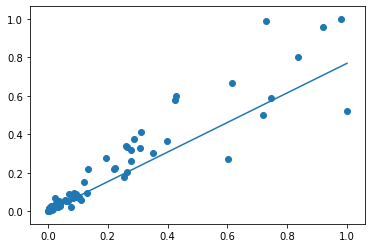

In [55]:

plt.scatter(data['AddressCount'], y)
x = np.linspace(0, 1)
y_ = x * lin_regr.coef_[0]
plt.plot(x, y_)
plt.show()

Мы видим, что по графику очень похоже, что у нас присуствует гетероскедастичность. Это происходит из-за особенностей данных.

In [56]:
from statsmodels.stats.stattools import durbin_watson

In [57]:
durbin_watson(data)

array([0.35340311, 0.04653299, 0.4207456 , 1.48      ])

Мы можем наблюдать автокорреляцию остатков в AddressCount, CallsCount, FirmsCount

Проверим критерием Стьюдента на значимость признаков:

In [60]:

corradr_clicks, p = spearmanr(y, data.AddressCount)
corradr_firms, p = spearmanr(y, data.FirmsCount)
corradr_users, p = spearmanr(y, data.CallsCount)
print('Рассмотрим к-ты для таргета и фич:', 
      corradr_clicks, ', ', corradr_firms, ', ', corradr_users)


Рассмотрим к-ты для таргета и фич: 0.9649923897475566 ,  0.7447242830489691 ,  0.866145092460882


Посмотрим на статистики Стьюдента:

In [63]:
t1 = corradr_clicks * np.sqrt(76) / np.sqrt(1 - corradr_clicks **2)
t1

32.07517359555236

In [65]:
t2 = corradr_firms * np.sqrt(76) / np.sqrt(1 - corradr_firms **2)
t2

9.728237306328063

In [66]:
t2 = corradr_users * np.sqrt(76) / np.sqrt(1 - corradr_users **2)
t2

15.108021439299462

Крит.точка даже для alpha = 0.001, k = 75 t = 3.46, все наши статистики больше => отвергаем H0 о равенстве к-оф к-ции 0, все фичи важны.


Все выбранные фичи значимы и прямо пропорционально линейно связаны с количеством кликов. В данных присуствует гетероскедастичность, которую можно объяснить нашим набором данных. 

### Вывод:

В исходных данных присуствовали выбросы, мы их удалили.

Все переменные в данных скоррелированы между собой, что объясняется природой данных(если заведение популярно, то и к-во просмотров с разных источников велико)
При этом данные не мультиколлинеарны. 

В данных присуствует гетероскедастичность, которая объясняется природой данных(чем более место популярно, тем больше людей заинтересованы в каком-либо действии с ним)

По данным построена линейная модель, в которой все параметры значимы.